TeamID:  8

Semester:	5th

Division:	E

TitleID : 5DMACP02
Project Title :  AETA Earthquake Prediction AI Algorithm Competition 2021

Problem Statement : The hope of promoting the solution of scientific problems of earthquake prediction and forecast

........................................................................................................................................................................................................................................................

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("current =", dt_string)	

current = 23/10/2021 01:42:56


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
print("Gathering information about the AETA Stations...")
aeta_stations = pd.read_csv('E:\DMA\BL_20210124\data\StationInfo.csv')
print("...Successful")
aeta_stations

Gathering information about the AETA Stations...
...Successful


Title  StationID   Longitude   Latitude  MagnData  MagnUpdate  \
0         都江堰中学         19  103.650000  30.980000      True        True   
1          通海山洞         24  102.750000  24.120000      True        True   
2       康定姑咱山洞B         26  102.170000  30.120000      True        True   
3          楚雄山洞         29  101.540000  25.030000      True        True   
4         西昌气象局         32  102.270000  27.900000      True       False   
..          ...        ...         ...        ...       ...         ...   
154        迪庆维西      60139   99.351590  27.123130      True        True   
155     大理古城月溪井      60157  100.180000  25.700000      True        True   
156        冕宁灵山      60195  102.214539  28.563093      True        True   
157        绵阳北川      60241  104.440000  31.790000      True        True   
158  石棉县安顺彝族乡政府      60251  102.270000  29.160000      True        True   

     SoundData  SoundUpdate  
0         True         True  
1         True         True  
2         True         True  
3         True         True  
4         True         True  
..         ...          ...  
154       True         True  
155       True         True  
156       True         True  
157       True         True  
158       True         True  

[159 rows x 8 columns]

In [ ]:
print("Finding the extreme coordinates of the worksite...")
BoundingBox_aeta_stations=(aeta_stations.Longitude.min(),
                           aeta_stations.Longitude.max(),
                           aeta_stations.Latitude.min(),
                           aeta_stations.Latitude.max())
print(BoundingBox_aeta_stations)
print("...Done")

Finding the extreme coordinates of the worksite...
(98.43, 106.14, 23.0, 33.58)
...Done


In [ ]:
print("Reading the Earthquake of magnitude>3.5 from past years...(2016-2020)")
eqloc=pd.read_csv('E:\DMA\BL_20210124\data\eqlst.csv')
print("...Done Reading")
eqloc

Reading the Earthquake of magnitude>3.5 from past years...(2016-2020)
...Done Reading


Longitude  Latitude  Magnitude                 Time   Timestamp  Week  \
0       101.39     27.92        3.9  2016-12-25 07:26:06  1482621966    12   
1       105.60     29.47        4.8  2016-12-27 08:17:32  1482797852    13   
2       105.55     29.43        3.9  2016-12-28 12:43:50  1482900230    13   
3       104.72     28.16        4.2  2017-01-15 18:05:35  1484474735    15   
4       104.73     28.14        3.7  2017-01-15 19:20:53  1484479253    15   
..         ...       ...        ...                  ...         ...   ...   
184     104.19     31.85        3.6  2020-10-25 02:04:33  1603562673   212   
185     104.53     29.52        3.6  2020-10-28 11:54:31  1603857271   213   
186     105.18     32.08        3.6  2020-10-31 14:38:08  1604126288   213   
187     104.73     28.17        4.1  2020-11-13 03:18:12  1605208692   215   
188      98.48     24.50        3.6  2020-11-21 22:04:46  1605967486   216   

     Location  
0    四川凉山州木里县  
1       重庆荣昌区  
2       重庆荣昌区  
3     四川宜宾市珙县  
4    四川宜宾市筠连县  
..        ...  
184  四川绵阳市北川县  
185  四川内江市威远县  
186  四川绵阳市江油市  
187   四川宜宾市珙县  
188   云南德宏州芒市  

[189 rows x 7 columns]

In [ ]:
print("Finding Extreme points of earthquake occurance...")
BoundingBox_eqloc=(eqloc.Longitude.min(),eqloc.Longitude.max(),eqloc.Latitude.min(),eqloc.Latitude.max())
print("...Done Reading")
BoundingBox_eqloc

Finding Extreme points of earthquake occurance...
...Done Reading


(98.43, 105.69, 22.51, 33.59)

Plotting the happenings of earthquake on the map...
Plotting the AETA stations...

Red	Epicentre
Green	AETA Station


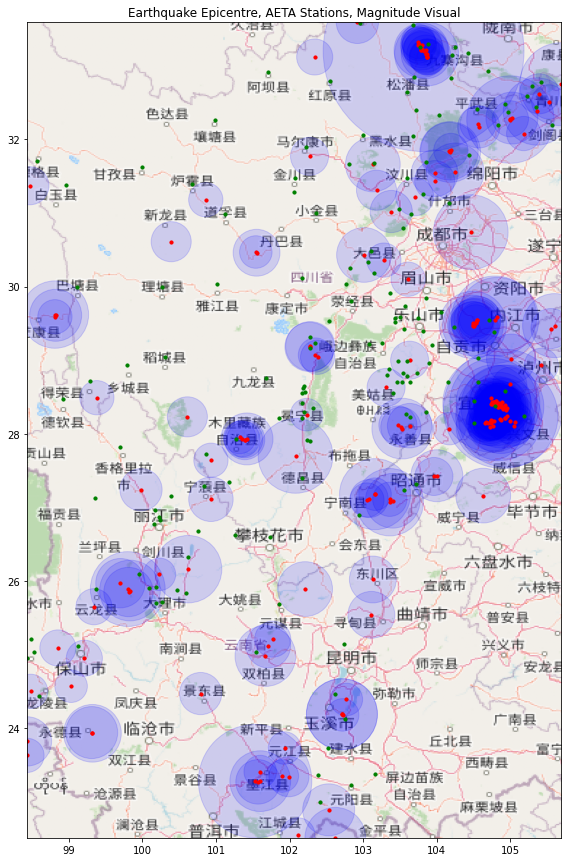

In [ ]:
Map=plt.imread('E:\DMA\BL_20210124\import_image\map.png')

print("Plotting the happenings of earthquake on the map...")

imagesize=(15,15)

fig, ax = plt.subplots(figsize = imagesize)
#Range=2**(math.log10(loc.Magnitude))                          #assumption
ax.scatter(eqloc.Longitude,
           eqloc.Latitude,
           zorder=1, alpha= 0.15,
           c='b',
           s=(2**(4.8+(eqloc.Magnitude*1.5)))/10**0)
ax.scatter(eqloc.Longitude,
           eqloc.Latitude,
           zorder=1,
           alpha= 1,
           c='r',
           s=10)

#alpha=darkness(0-1)
#c=color
#s=radius

print("Plotting the AETA stations...")
print("")
print("Red\tEpicentre")
print("Green\tAETA Station")

ax.set_title('Earthquake Epicentre, AETA Stations, Magnitude Visual')
ax.set_xlim(BoundingBox_eqloc[0],BoundingBox_eqloc[1])
ax.set_ylim(BoundingBox_eqloc[2],BoundingBox_eqloc[3])

ax.scatter(aeta_stations.Longitude, aeta_stations.Latitude, zorder=1, alpha= 1, c='g', s=10)
ax.imshow(Map, zorder=0, extent = BoundingBox_eqloc, aspect= 'equal')

**EDA**

In [ ]:
import pandas as pd
import glob

path_EM_selected = r'E:\DMA\BL_20210124\selected_stations_EDA' 
path_GA_selected = r'E:\DMA\BL_20210124\selected_stations_EDA' 

all_files_selected_EM = glob.glob(path_EM_selected + "/*magn.csv")

li_EM_selected = []

for filename_EM in all_files_selected_EM:
    df_EM = pd.read_csv(filename_EM, index_col=None, header=0)
    li_EM_selected.append(df_EM)
    

EM_selected = pd.concat(li_EM_selected, axis=0, ignore_index=True)
print("EM data...Merged")


import pandas as pd
import glob

all_files_selected_GA = glob.glob(path_GA_selected + "/*sound.csv")

li_GA_selected = []

for filename_GA in all_files_selected_GA:
    df_GA = pd.read_csv(filename_GA, index_col=None, header=0)
    li_GA_selected.append(df_GA)

GA_selected = pd.concat(li_GA_selected, axis=0, ignore_index=True)
print("GA data...Merged")

EM data...Merged
GA data...Merged


In [ ]:
EM_selected.head()

StationID   TimeStamp  magn@var  magn@power  magn@skew  magn@kurt  \
0        101  1492655400  0.436796    0.436796   0.420983   -1.04993   
1        101  1492656000  0.791376    0.791379   0.302726   -1.37908   
2        101  1492656600  0.430008    0.430013   0.417914   -1.30359   
3        101  1492657200  0.447031    0.447054   0.428676   -1.32100   
4        101  1492657800  0.195062    0.195068   0.006419   -1.47167   

   magn@abs_max  magn@abs_mean  magn@abs_max_top5p  magn@abs_max_top10p  ...  \
0      2.533950       0.584602            1.069160             1.003160  ...   
1      1.509050       0.791962            1.425230             1.340290  ...   
2      1.171160       0.583969            1.087530             1.018910  ...   
3      1.526485       0.596976            1.094660             1.041035  ...   
4      0.963779       0.395866            0.616144             0.590643  ...   

   magn@ulf_abs_mean  magn@ulf_var  magn@ulf_power  magn@ulf_skew  \
0           0.045252      0.026035        0.026035       0.929587   
1           0.004838      0.000065        0.000068     -10.488294   
2           0.005826      0.000059        0.000064       1.006520   
3           0.013860      0.002194        0.002198      -0.483845   
4           0.009615      0.000249        0.000254       3.307840   

   magn@ulf_kurt  magn@ulf_abs_max  magn@ulf_abs_max_top5p  \
0      39.545200          1.469410                0.065012   
1     451.531571          0.074649                0.007769   
2       5.081390          0.052368                0.008137   
3      38.403300          0.445404                0.034081   
4      21.661200          0.176903                0.013846   

   magn@ulf_abs_max_top10p  magn@ulf_energy_sstd  magn@ulf_energy_smax  
0                 0.018049              0.053194              0.510162  
1                 0.005579              0.000075              0.000710  
2                 0.005354              0.000047              0.000360  
3                 0.015673              0.004169              0.038960  
4                 0.009185              0.000320              0.002917  

[5 rows x 53 columns]

In [ ]:
GA_selected.head()

StationID   TimeStamp  sound@var  sound@power  sound@skew  sound@kurt  \
0        101  1492655400   0.018103     0.018103     6.85884    219.0560   
1        101  1492656000   0.000000     0.000000     0.00000      0.0000   
2        101  1492656600   0.000000     0.000000     0.00000      0.0000   
3        101  1492657200   0.038851     0.038851     9.09478    302.0036   
4        101  1492657800   0.000000     0.000000     0.00000      0.0000   

   sound@abs_max  sound@abs_mean  sound@abs_max_top5p  sound@abs_max_top10p  \
0   3.442280e+00    1.671990e-02         5.185360e-04          2.954770e-07   
1   2.249710e-25    1.035420e-25         1.040290e-25          1.040290e-25   
2   2.249710e-25    1.035420e-25         1.040290e-25          1.040290e-25   
3   3.638210e+00    3.504542e-02         1.623035e-02          3.232085e-05   
4   2.249710e-25    1.035420e-25         1.040290e-25          1.040290e-25   

   ...  sound@level5d_energy_sstd  sound@level6a_abs_mean  \
0  ...                   0.018925            1.101000e-02   
1  ...                   0.000000            1.033280e-25   
2  ...                   0.000000            1.033280e-25   
3  ...                   0.011867            1.360600e-02   
4  ...                   0.000000            1.033280e-25   

   sound@level6a_energy  sound@level6a_energy_smax  sound@level6a_energy_sstd  \
0             204.72200                   0.176559                   0.018925   
1               0.00000                   0.000000                   0.000000   
2               0.00000                   0.000000                   0.000000   
3             158.31585                   0.120369                   0.011867   
4               0.00000                   0.000000                   0.000000   

   sound@level6d_abs_mean  sound@level6d_energy  sound@level6d_energy_smax  \
0            1.057750e-02               146.439                   0.176559   
1            3.493620e-28                 0.000                   0.000000   
2            3.493620e-28                 0.000                   0.000000   
3            1.592225e-02               298.052                   0.120369   
4            3.493620e-28                 0.000                   0.000000   

   sound@level6d_energy_sstd  sound@mean  
0                   0.018925    2.307300  
1                   0.000000    2.306290  
2                   0.000000    2.306290  
3                   0.011867    2.308655  
4                   0.000000    2.306290  

[5 rows x 46 columns]

In [ ]:
print("Changing the columns name...")
EM_selected = EM_selected.rename(columns = {'magn@var':'vari',
'magn@power':'power',
'magn@skew':'skewn',
'magn@kurt':'kurto',
'magn@abs_max':'abs_max',
'magn@abs_mean':'abs_mean',
'magn@abs_max_top5p':'abs_max_top5p',
'magn@abs_max_top10p':'abs_max_top10p',
'magn@energy_sstd':'energy_sstd',
'magn@energy_smax':'energy_smax',
'magn@power_0_5':'power_0_5',
'magn@power_5_10':'power_5_10',
'magn@power_10_15':'power_10_15',
'magn@power_15_20':'power_15_20',
'magn@power_20_25':'power_20_25',
'magn@power_25_30':'power_25_30',
'magn@power_30_35':'power_30_35',
'magn@power_35_40':'power_35_40',
'magn@power_40_60':'power_40_60',
'magn@power_140_160':'power_140_160',
'magn@power_other':'power_other',
'magn@frequency_center':'frequency_center',
'magn@mean_square_frequency':'mean_square_frequency',
'magn@variance_frequency':'variance_frequency',
'magn@frequency_entropy':'frequency_entropy',
'magn@level4d_abs_mean':'level4d_abs_mean',
'magn@level4d_energy':'level4d_energy',
'magn@level4d_energy_smax':'level4d_energy_smax',
'magn@level4d_energy_sstd':'level4d_energy_sstd',
'magn@level5d_abs_mean':'level5d_abs_mean',
'magn@level5d_energy':'level5d_energy',
'magn@level5d_energy_smax':'level5d_energy_smax',
'magn@level5d_energy_sstd':'level5d_energy_sstd',
'magn@level6a_abs_mean':'level6d_abs_mean',
'magn@level6a_energy':'level6d_energy',
'magn@level6a_energy_smax':'level6d_energy_smax',
'magn@level6a_energy_sstd':'level6d_energy_sstd',
'magn@level6d_abs_mean':'level6a_abs_mean',
'magn@level6d_energy':'level6a_energy',
'magn@level6d_energy_smax':'level6a_energy_smax',
'magn@level6d_energy_sstd':'level6a_energy_sstd',
'magn@ulf_abs_mean':'ulf_abs_mean',
'magn@ulf_var':'ulf_var',
'magn@ulf_power':'ulf_power',
'magn@ulf_skew':'ulf_skew',
'magn@ulf_kurt':'ulf_kurt',
'magn@ulf_abs_max':'ulf_abs_max',
'magn@ulf_abs_max_top5p':'ulf_abs_max_top5p',
'magn@ulf_abs_max_top10p':'ulf_abs_max_top10p',
'magn@ulf_energy_sstd':'ulf_energy_sstd',
'magn@ulf_energy_smax':'ulf_energy_smax',
}, inplace = False)
print("Change Successful")

Changing the columns name...
Change Successful


In [ ]:
print("Changing the columns name...")
GA_selected = GA_selected.rename(columns = {'sound@var':'vari',
'sound@power':'power',
'sound@skew':'skewn',
'sound@kurt':'kurto',
'sound@abs_max':'abs_max',
'sound@abs_mean':'abs_mean',
'sound@abs_max_top5p':'abs_max_top5p',
'sound@abs_max_top10p':'abs_max_top10p',
'sound@energy_sstd':'energy_sstd',
'sound@energy_smax':'energy_smax',
'sound@s_zero_rate':'s_zero_rate',
'sound@s_zero_rate_max':'s_zero_rate_max',
'sound@power_0_5':'power_0_5',
'sound@power_5_10':'power_5_10',
'sound@power_10_15':'power_10_15',
'sound@power_15_20':'power_15_20',
'sound@power_20_25':'power_20_25',
'sound@power_25_30':'power_25_30',
'sound@power_30_35':'power_30_35',
'sound@power_35_40':'power_35_40',
'sound@power_40_60':'power_40_60',
'sound@power_140_160':'power_140_160',
'sound@power_other':'power_other',
'sound@frequency_center':'frequency_center',
'sound@mean_square_frequency':'mean_square_frequency',
'sound@variance_frequency':'variance_frequency',
'sound@frequency_entropy':'frequency_entropy',
'sound@level4d_abs_mean':'level4d_abs_mean',
'sound@level4d_energy':'level4d_energy',
'sound@level4d_energy_smax':'level4d_energy_smax',
'sound@level4d_energy_sstd':'level4d_energy_sstd',
'sound@level5d_abs_mean':'level5d_abs_mean',
'sound@level5d_energy':'level5d_energy',
'sound@level5d_energy_smax':'level5d_energy_smax',
'sound@level5d_energy_sstd':'level5d_energy_sstd',
'sound@level6a_abs_mean':'level6d_abs_mean',
'sound@level6a_energy':'level6d_energy',
'sound@level6a_energy_smax':'level6d_energy_smax',
'sound@level6a_energy_sstd':'level6d_energy_sstd',
'sound@level6d_abs_mean':'level6a_abs_mean',
'sound@level6d_energy':'level6a_energy',
'sound@level6d_energy_smax':'level6a_energy_smax',
'sound@level6d_energy_sstd':'level6a_energy_sstd',
'sound@mean':'ga_mean',
}, inplace=False)

print("Change Successful")

Changing the columns name...
Change Successful


In [ ]:
import datetime as dt
import time
import matplotlib.dates as md
dates=[dt.datetime.fromtimestamp(ts) for ts in EM_selected.TimeStamp]

EM_selected['DateTime']=dates

xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')

In [ ]:
eq_dates = []
eq_dates=[dt.datetime.fromtimestamp(ts) for ts in eqloc.Timestamp]
eqloc['DateTime']=eq_dates

In [ ]:
imagesize=(32,18)
temp1=[]
temp2=[]
temp1=EM_selected.DateTime
temp2=EM_selected.abs_mean
temp3=[]


In [ ]:
from math import log
for i in range(len(temp2)):
    temp3.append(log(temp2[i]))

In [ ]:
len(temp1)

1353442

In [ ]:
len(temp3)

1353442

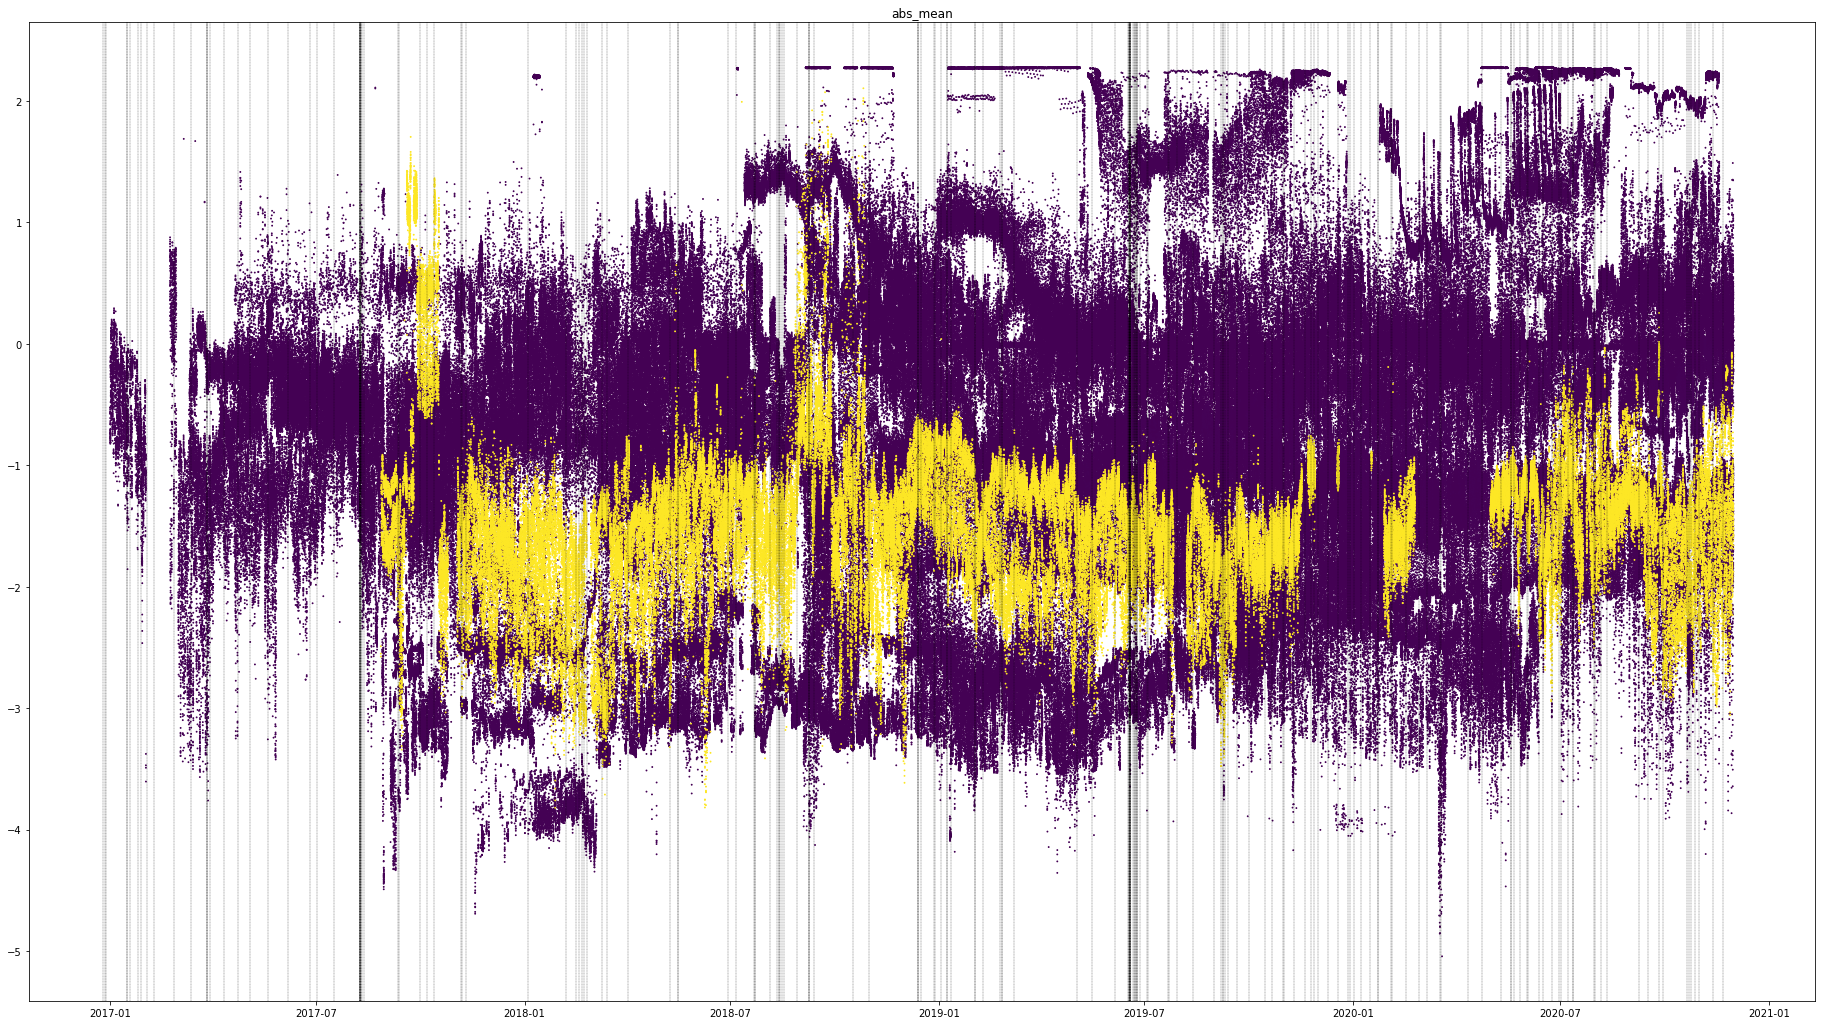

In [ ]:
#imagesize=(36,24)

fig, ex = plt.subplots(figsize = imagesize)
plt.title("abs_mean")
ex.scatter(temp1, temp3, marker='.', c=EM_selected.StationID, s=3)
for i in eq_dates:
    plt.axvline(x=i, c='black', linewidth=0.3,linestyle='--')
plt.show()

In [ ]:
arr_Longitude = list(aeta_stations.Longitude)
arr_Latitude = list(aeta_stations.Latitude)
arr_StationID = list(aeta_stations.StationID)

applying Clustering...using K means
Finding clusters...

Coordinates...
Longitude : 	[104.49375, 99.44875, 103.67882352941176, 102.08470588235294, 101.41230769230769, 104.82338983050848, 98.858, 101.77125, 104.47, 103.31941176470588]
Latitude : 	[29.564375000000002, 25.02375, 33.22470588235294, 23.757058823529412, 27.995384615384616, 28.30898305084746, 29.736, 30.41125, 31.884285714285713, 27.24529411764706]


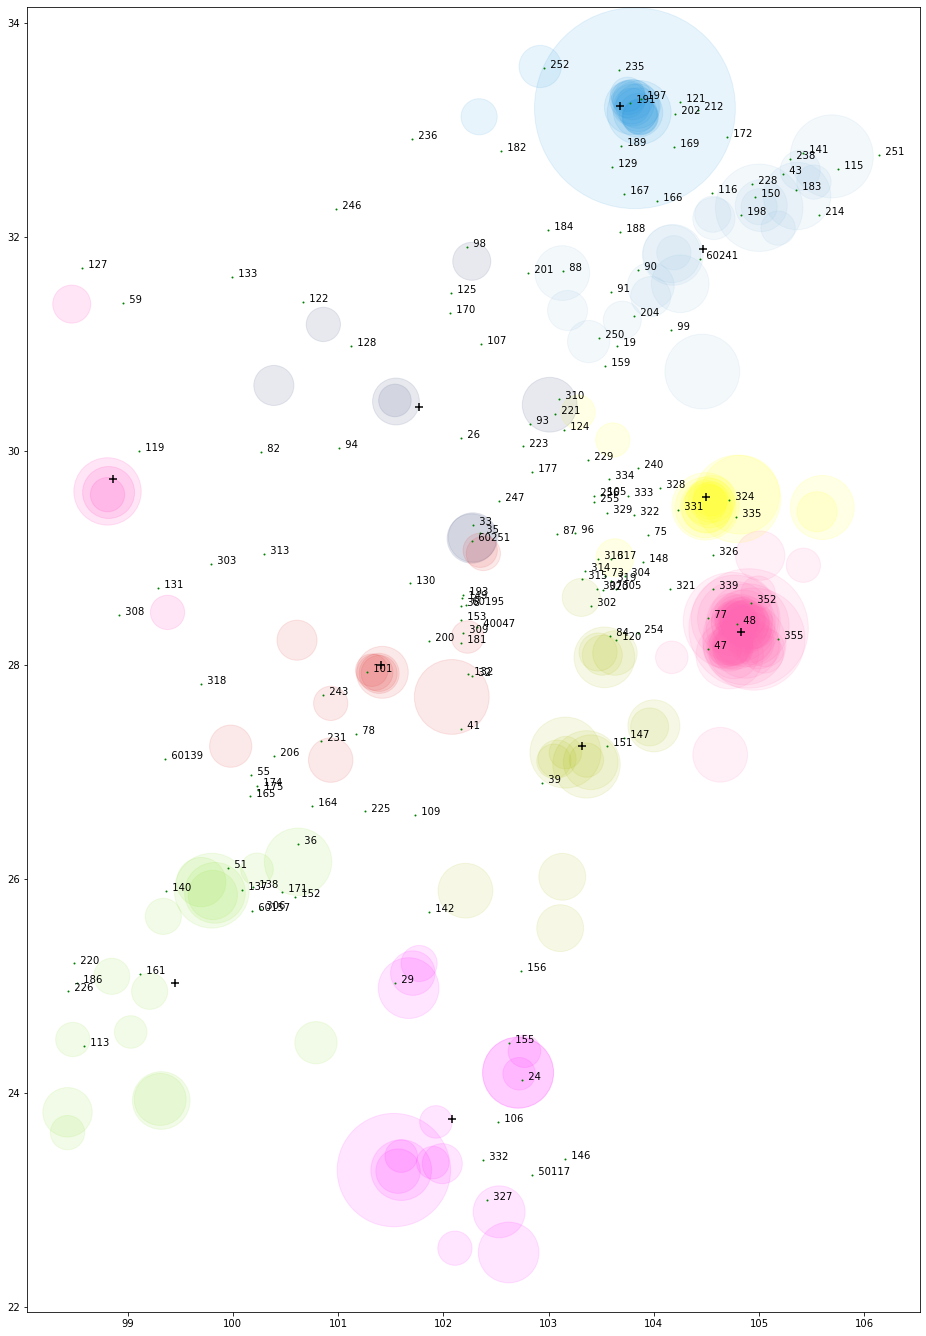

In [ ]:
print("applying Clustering...using K means")

from sklearn.cluster import KMeans

imagesize=(16,24)
fig, cx = plt.subplots(figsize = imagesize)

print("Finding clusters...")

cluster_size = 10

# k means
kmeans = KMeans(n_clusters=cluster_size, random_state=0)
eqloc['cluster'] = kmeans.fit_predict(eqloc[['Longitude', 'Latitude']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

# add to df
if(cluster_size==1):
    eqloc['cen_x'] = eqloc.cluster.map({0:cen_x[0]})
    eqloc['cen_y'] = eqloc.cluster.map({0:cen_y[0]})

if(cluster_size==10):
    eqloc['cen_x'] = eqloc.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6], 7:cen_x[7],8:cen_x[8], 9:cen_x[9]})
    eqloc['cen_y'] = eqloc.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3],4:cen_y[4], 5:cen_y[5], 6:cen_y[6], 7:cen_y[7],8:cen_y[8], 9:cen_y[9]})

# define and map colors
colors = ['#FFFF00', '#81DF20', '#2095DF', '#FF00FF', '#DF2020', '#FF69B4', '#FF00AA', '#20306A', '#8ABCDF', '#AABB00']

eqloc['c'] = eqloc.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8], 9:colors[9]})
cx.scatter(eqloc.Longitude, eqloc.Latitude, c=eqloc.c, alpha = 0.1, s=(2**((4.8+(eqloc.Magnitude*1.5)))/10**0))
cx.scatter(cen_x, cen_y, marker='+', c='black', s=70)

cx.scatter(aeta_stations.Longitude, aeta_stations.Latitude, zorder=1, alpha= 1, c='g', s=1)

x1,y1,z1 = arr_Longitude,arr_Latitude,arr_StationID
annotations = []
for x_i, y_i, z_i in zip(x1,y1,z1):
    annotations.append(plt.text(x_i,y_i, '  {}'.format(z_i)))


print("")
print("Coordinates...")
print("Longitude : \t",end='')
print(cen_x)
print("Latitude : \t",end='')
print(cen_y)


<AxesSubplot:>

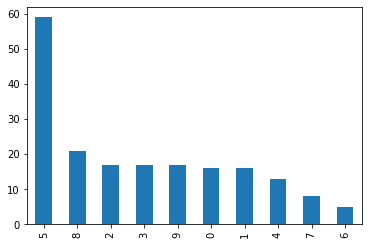

In [ ]:
#showing numbers of earthquake within the clusters
eqloc.cluster.value_counts(dropna=False).plot(kind='bar')

In [ ]:
mean_epicentre = []
for i in range(cluster_size):
    x=[i,cen_x[i],cen_y[i],eqloc.cluster.value_counts(dropna=False)[i]]
    mean_epicentre.append(x)

print(mean_epicentre)

[[0, 104.49375, 29.564375000000002, 16], [1, 99.44875, 25.02375, 16], [2, 103.67882352941176, 33.22470588235294, 17], [3, 102.08470588235294, 23.757058823529412, 17], [4, 101.41230769230769, 27.995384615384616, 13], [5, 104.82338983050848, 28.30898305084746, 59], [6, 98.858, 29.736, 5], [7, 101.77125, 30.41125, 8], [8, 104.47, 31.884285714285713, 21], [9, 103.31941176470588, 27.24529411764706, 17]]


In [ ]:
epicentre = pd.DataFrame(mean_epicentre)
epicentre.columns = ['AreaCode', 'Longitude', 'Latitude', 'Weight']
epicentre.to_csv('mean_epicentre.csv', index=False)

In [ ]:
epicentre

AreaCode   Longitude   Latitude  Weight
0         0  104.493750  29.564375      16
1         1   99.448750  25.023750      16
2         2  103.678824  33.224706      17
3         3  102.084706  23.757059      17
4         4  101.412308  27.995385      13
5         5  104.823390  28.308983      59
6         6   98.858000  29.736000       5
7         7  101.771250  30.411250       8
8         8  104.470000  31.884286      21
9         9  103.319412  27.245294      17

In [ ]:
aeta_stations['AreaCode']=-1

In [ ]:
aeta_stations

Title  StationID   Longitude   Latitude  MagnData  MagnUpdate  \
0         都江堰中学         19  103.650000  30.980000      True        True   
1          通海山洞         24  102.750000  24.120000      True        True   
2       康定姑咱山洞B         26  102.170000  30.120000      True        True   
3          楚雄山洞         29  101.540000  25.030000      True        True   
4         西昌气象局         32  102.270000  27.900000      True       False   
..          ...        ...         ...        ...       ...         ...   
154        迪庆维西      60139   99.351590  27.123130      True        True   
155     大理古城月溪井      60157  100.180000  25.700000      True        True   
156        冕宁灵山      60195  102.214539  28.563093      True        True   
157        绵阳北川      60241  104.440000  31.790000      True        True   
158  石棉县安顺彝族乡政府      60251  102.270000  29.160000      True        True   

     SoundData  SoundUpdate  AreaCode  
0         True         True        -1  
1         True         True        -1  
2         True         True        -1  
3         True         True        -1  
4         True         True        -1  
..         ...          ...       ...  
154       True         True        -1  
155       True         True        -1  
156       True         True        -1  
157       True         True        -1  
158       True         True        -1  

[159 rows x 9 columns]

In [ ]:
for i in range(aeta_stations.shape[0]):
    x=aeta_stations.Longitude[i]
    y=aeta_stations.Latitude[i]
    area_min=-1
    dist_min=999
    for j in range(cluster_size):
        dist=math.sqrt(((x-epicentre.Longitude[j])**2)+((y-epicentre.Latitude[j])**2))
        if(dist<dist_min):
            dist_min=dist
            area_min=epicentre.AreaCode[j]
    print('..............')
    print(dist_min)
    print(aeta_stations.StationID[i])
    print(area_min)
    aeta_stations.AreaCode[i]=area_min
    print('')


..............
1.2207098971750867
19
8

..............
0.7578539176870708
24
3

..............
0.49378955537759633
26
7

..............
1.384587930405364
29
3

..............
0.8629799067919374
32
4

..............
1.2130861985036376
33
7

..............
1.31540986958438
35
7

..............
1.7544559341858654
36
1

..............
0.93898661225183
38
4

..............
0.5130120026655236
39
9

..............
0.963628804764981
41
4

..............
1.0371271151894728
43
8

..............
0.3514097271318677
47
5

..............
0.0784747593071728
48
5

..............
1.18725128974451
51
1

..............
1.6108202916012446
55
4

..............
1.6471611942976294
59
6

..............
1.2037216053245052
73
0

..............
0.6574349421235607
75
0

..............
0.3396742952172968
77
5

..............
0.6893724098965849
78
4

..............
1.434663723664879
82
6

..............
1.0573213199885938
84
9

..............
1.4550887268909147
87
0

..............
1.3455975078236508
88
8

........

<ipython-input-28-a97be990d75c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aeta_stations.AreaCode[i]=area_min


In [ ]:
for i in range(aeta_stations.shape[0]):
    print(aeta_stations.StationID[i],end='\t')
    print(aeta_stations.AreaCode[i])

19	8
24	3
26	7
29	3
32	4
33	7
35	7
36	1
38	4
39	9
41	4
43	8
47	5
48	5
51	1
55	4
59	6
73	0
75	0
77	5
78	4
82	6
84	9
87	0
88	8
90	8
91	8
93	7
94	7
96	0
98	7
99	8
101	4
105	0
106	3
107	7
109	4
113	1
115	8
116	8
119	6
120	9
121	2
122	7
124	7
125	7
127	6
128	7
129	2
130	4
131	6
132	4
133	7
137	1
138	1
140	1
141	8
142	3
146	3
147	9
148	0
149	4
150	8
151	9
152	1
153	4
155	3
156	3
159	8
161	1
164	4
165	4
166	8
167	2
169	2
170	7
171	1
172	2
174	4
175	4
177	7
181	4
182	2
183	8
184	2
186	1
188	8
189	2
191	2
193	4
197	2
198	8
200	4
201	7
202	2
204	8
206	4
212	2
214	8
220	1
221	7
223	7
225	4
226	1
228	8
229	0
231	4
235	2
236	2
238	8
240	0
243	4
246	7
247	7
250	8
251	8
252	2
254	5
255	0
256	0
302	9
303	6
304	0
305	0
306	1
307	0
308	6
309	4
310	7
313	4
314	0
315	0
316	0
317	0
318	4
319	0
320	0
321	5
322	0
324	0
326	0
327	3
328	0
329	0
331	0
332	3
333	0
334	0
335	0
339	5
352	5
355	5
40047	4
50117	3
60139	1
60157	1
60195	4
60241	8
60251	7


In [ ]:
if(False):
    import os
    import pandas as pd
    import re
    from tqdm import tqdm
    from config import *
    from toolkit import *

    if __name__ == "__main__":
        fileName_list = os.listdir(Data_Folder_Path)
        stationInfo_list = pd.read_csv(Station_Info_Path)

        _continueable_stations = stationInfo_list[stationInfo_list['MagnUpdate']&stationInfo_list['SoundUpdate']]['StationID'].unique()
        _continueable_stations = set(_continueable_stations)
        re_magn = re.compile(r'(\d+)_magn.csv')
        re_sound = re.compile(r'(\d+)_sound.csv')
        _set_magn = set()
        _set_sound = set()
        for filename in fileName_list:
            _magn_match = re_magn.findall(filename)
            _sound_match = re_sound.findall(filename)
            if(_magn_match):
                _set_magn.add(int(_magn_match[0]))
                continue
            if(_sound_match):
                _set_sound.add(int(_sound_match[0]))
                continue
        usable_stations = _continueable_stations&_set_magn&_set_sound
        dump_object(Usable_Station_Path, usable_stations)

        for type in ('magn', 'sound'):
            res = []
            for _id in tqdm(usable_stations, desc=f'{type}:'):
                _df = pd.read_csv(Data_Folder_Path+str(_id)+f'_{type}.csv')[Used_features[type]]
                res.append(_df)
            final_df = pd.concat(res)
            final_df.to_pickle(Merged_Data_Path[type])
            del(final_df)

In [ ]:
for i in range(cluster_size):
    for j in range(aeta_stations.shape[0]):
        if(i==aeta_stations.AreaCode[j]):
            print(aeta_stations.StationID[j],end=',')
    print('')

73,75,87,96,105,148,229,240,255,256,304,305,307,314,315,316,317,319,320,322,324,326,328,329,331,333,334,335,
36,51,113,137,138,140,152,161,171,186,220,226,306,60139,60157,
121,129,167,169,172,182,184,189,191,197,202,212,235,236,252,
24,29,106,142,146,155,156,327,332,50117,
32,38,41,55,78,101,109,130,132,149,153,164,165,174,175,181,193,200,206,225,231,243,309,313,318,40047,60195,
47,48,77,254,321,339,352,355,
59,82,119,127,131,303,308,
26,33,35,93,94,98,107,122,124,125,128,133,170,177,201,221,223,246,247,310,60251,
19,43,88,90,91,99,115,116,141,150,159,166,183,188,198,204,214,228,238,250,251,60241,
39,84,120,147,151,302,


In [ ]:
epicentre['A']=epicentre.Latitude-0.637
epicentre['B']=epicentre.Latitude+0.637
epicentre['C']=epicentre.Longitude-0.637
epicentre['D']=epicentre.Longitude+0.637
epicentre
# for i in range(cluster_size):
#     print(epicentre.A[i],end=',')
#     print(epicentre.B[i],end=',')
#     print(epicentre.C[i],end=',')
#     print(epicentre.D[i])

AreaCode   Longitude   Latitude  Weight          A          B           C  \
0         0  104.493750  29.564375      16  28.927375  30.201375  103.856750   
1         1   99.448750  25.023750      16  24.386750  25.660750   98.811750   
2         2  103.678824  33.224706      17  32.587706  33.861706  103.041824   
3         3  102.084706  23.757059      17  23.120059  24.394059  101.447706   
4         4  101.412308  27.995385      13  27.358385  28.632385  100.775308   
5         5  104.823390  28.308983      59  27.671983  28.945983  104.186390   
6         6   98.858000  29.736000       5  29.099000  30.373000   98.221000   
7         7  101.771250  30.411250       8  29.774250  31.048250  101.134250   
8         8  104.470000  31.884286      21  31.247286  32.521286  103.833000   
9         9  103.319412  27.245294      17  26.608294  27.882294  102.682412   

            D  
0  105.130750  
1  100.085750  
2  104.315824  
3  102.721706  
4  102.049308  
5  105.460390  
6   99.495000  
7  102.408250  
8  105.107000  
9  103.956412

In [ ]:

area_groups = [
        {'id':set([73,75,87,96,105,148,229,240,255,256,304,305,307,314,315,316,317,319,320,322,324,326,328,329,331,333,334,335]),'range':[28.927375,30.201375000000002,103.85675,105.13075]},
        {'id':set([36,51,113,137,138,140,152,161,171,186,220,226,306,60139,60157]),'range':[24.38675,25.66075,98.81175,100.08575]},
        {'id':set([121,129,167,169,172,182,184,189,191,197,202,212,235,236,252]),'range':[32.58770588235294,33.86170588235294,103.04182352941176,104.31582352941176]},
        {'id':set([24,29,106,142,146,155,156,327,332,50117]),'range':[23.120058823529412,24.394058823529413,101.44770588235293,102.72170588235294]},
        {'id':set([32,38,41,55,78,101,109,130,132,149,153,164,165,174,175,181,193,200,206,225,231,243,309,313,318,40047,60195]),'range':[27.358384615384615,28.632384615384616,100.77530769230769,102.04930769230769]},
        {'id':set([47,48,77,254,321,339,352,355]),'range':[27.67198305084746,28.94598305084746,104.18638983050847,105.46038983050848]},
        {'id':set([59,82,119,127,131,303,308]),'range':[29.099,30.373,98.221,99.495]},
        {'id':set([26,33,35,93,94,98,107,122,124,125,128,133,170,177,201,221,223,246,247,310,60251]),'range':[29.77425,31.04825,101.13425,102.40825]},
        {'id':set([19,43,88,90,91,99,115,116,141,150,159,166,183,188,198,204,214,228,238,250,251,60241]),'range':[31.247285714285713,32.52128571428571,103.833,105.107]},
        {'id':set([39,84,120,147,151,302]),'range':[26.60829411764706,27.88229411764706,102.68241176470588,103.95641176470588]}
    ]

if(cluster_size==1):
    area_groups = [
        {'id':set([19,24,26,29,32,33,35,36,38,39,41,43,47,48,51,55,59,73,75,77,78,82,84,87,88,90,91,93,94,
        96,98,99,101,105,106,107,109,113,115,116,119,120,121,122,124,125,127,128,129,130,131,132,133,137,
        138,140,141,142,146,147,148,149,150,151,152,153,155,156,159,161,164,165,166,167,169,170,171,172,174,
        175,177,181,182,183,184,186,188,189,191,193,197,198,200,201,202,204,206,212,214,220,221,223,225,226,
        228,229,231,235,236,238,240,243,246,247,250,251,252,254,255,256,302,303,304,305,306,307,308,309,310,
        313,314,315,316,317,318,319,320,321,322,324,326,327,328,329,331,332,333,334,335,339,352,355,40047,
        50117,60139,60157,60195,60241,60251]),'range':[27.939614,29.213614,102.658026,103.932026]}
    ]


In [ ]:
if(False):    
    from pandas.core.indexing import is_label_like
    from typing_extensions import final
    from config import *
    from toolkit import *
    import pandas as pd
    import warnings
    warnings.filterwarnings('ignore')

    def cacu_features(df:pd.DataFrame, window:int, step:int,tag:str,eqData:pd.DataFrame,flag:str) ->pd.DataFrame:

        if(len(df)==0):
            return None
        df.reset_index(drop=True,inplace=True)
        averageName = tag+'@abs_mean'
        df.rename(columns={averageName:'average'},inplace=True)
        df['average'] = df['average']-df['average'].mean()
        df['diff_1'] = df.groupby('StationID')['average'].shift(1)
        df['diff_1'] = df['average'].values - df['diff_1'].values

        df.loc[:,'Day'] = df['TimeStamp']
        _start_timestamp = string2stamp(Time_Range[flag][0])
        df['Day'] = df['Day'] - _start_timestamp
        df['Day'] = (df['Day']//86400+1).astype(int)
        df.reset_index()
        tmp = pd.DataFrame(sorted(df['Day'].unique()))
        tmp.columns=['Day']
        res_df = pd.DataFrame((tmp['Day']//step+1).unique()).astype(int)
        res_df.columns=['Day']
        res_df['Day'] = res_df['Day']*step
        for feature in ['average', 'diff_1']:
            for tagging in ['max', 'min', 'mean']:
                kk = df.groupby('Day')[feature].agg(tagging)
                kk.rename(f'{feature}_day_{tagging}',inplace=True)
                tmp = pd.merge(tmp, kk, how='left',on='Day')
            #max_mean.min_mean:
            tmp[f'{feature}_day_max_mean'] = tmp[f'{feature}_day_max'].rolling(window=window,center=False).mean()
            tmp[f'{feature}_day_min_mean'] = tmp[f'{feature}_day_min'].rolling(window=window,center=False).mean()
            #mean_max,mean_min:
            tmp[f'{feature}_day_mean_max'] = tmp[f'{feature}_day_mean'].rolling(window=window,center=False).max()
            tmp[f'{feature}_day_mean_min'] = tmp[f'{feature}_day_mean'].rolling(window=window,center=False).min()
            res_df = pd.merge(res_df,tmp[['Day',f'{feature}_day_max_mean',f'{feature}_day_min_mean',f'{feature}_day_mean_max',f'{feature}_day_mean_min']],on='Day',how='left')


            res_df[f'{feature}_mean'] = None
            res_df[f'{feature}_max'] = None
            res_df[f'{feature}_min'] = None
            res_df[f'{feature}_max_min'] = None
            for i,row in res_df.iterrows():
                endDay = row['Day']
                startDay = endDay - window
                data_se = df[(df['Day']>startDay)&(df['Day']<=endDay)][feature]
                res_df[f'{feature}_mean'].iloc[i] = data_se.mean()
                res_df[f'{feature}_max'].iloc[i] = data_se.max()
                res_df[f'{feature}_min'].iloc[i] = data_se.min()
                res_df[f'{feature}_max_min'].iloc[i] = data_se.max() - data_se.min()


            res_df[f'{feature}_lastday_mean'] = None
            res_df[f'{feature}_lastday_max'] = None
            res_df[f'{feature}_lastday_min'] = None
            res_df[f'{feature}_lastday_max_min'] = None
            for i,row in res_df.iterrows():
                endDay = row['Day']
                data_last = df[df['Day']==endDay][feature]
                res_df[f'{feature}_lastday_mean'].iloc[i] = data_last.mean()
                res_df[f'{feature}_lastday_max'].iloc[i] = data_last.max()
                res_df[f'{feature}_lastday_min'].iloc[i] = data_last.min()
                res_df[f'{feature}_lastday_max_min'].iloc[i] = data_last.max() - data_last.min()
        
        for name in res_df.columns.to_list():
            if(name=='Day'):continue
            res_df.rename(columns={name:(name+'_'+tag)},inplace=True)
        res_df.dropna(axis=0,how='any',inplace=True)
        res_df.reset_index(drop=True,inplace=True)
        res_df['label_M'] = None
        res_df['label_long'] = None
        res_df['label_lati'] = None
        zero_stamp = _start_timestamp
        for i,row in res_df.iterrows():
            endDay = row['Day']
            endStamp = zero_stamp + (endDay-1)*86400
            pre_Range_left = endStamp+86400*2   
            pre_Range_right = endStamp+86400*9
            _eq = eqData[(eqData['Timestamp']<pre_Range_right) & (eqData['Timestamp']>=pre_Range_left)]
            if(len(_eq)==0):
                res_df['label_M'].iloc[i] = 0
                res_df['label_long'].iloc[i] = -1
                res_df['label_lati'].iloc[i] = -1
            else:
                _eq_max = _eq.iloc[_eq['Magnitude'].argmax()]
                res_df['label_M'].iloc[i] = _eq_max['Magnitude']
                res_df['label_long'].iloc[i] = _eq_max['Longitude']
                res_df['label_lati'].iloc[i] = _eq_max['Latitude']
        return res_df

        
    if __name__ == "__main__":
        EqData = pd.read_csv(Eq_list_path)
        magn_data = load_object(Merged_Data_Path['magn'])
        sound_data = load_object(Merged_Data_Path['sound'])


        for i,area in enumerate(area_groups):
            ID_list = area['id']
            range_list = area['range']
            eqData_area = EqData[(EqData['Latitude']>=range_list[0]) & (EqData['Latitude']<=range_list[1]) & 
                                    (EqData['Longitude']>=range_list[2]) & (EqData['Longitude']<=range_list[3])]

            local_magn_data = magn_data[magn_data['StationID'].apply(lambda x:x in ID_list)].reset_index(drop=True)
            local_sound_data = sound_data[sound_data['StationID'].apply(lambda x:x in ID_list)].reset_index(drop=True)
            for flag in ['train', 'valid']:
                time_range = Time_Range[flag]
                start_stamp = string2stamp(time_range[0])
                end_stamp = string2stamp(time_range[1])
                _df_magn = local_magn_data[(local_magn_data['TimeStamp']>=start_stamp)&(local_magn_data['TimeStamp']<end_stamp)]
                _df_sound = local_sound_data[(local_sound_data['TimeStamp']>=start_stamp)&(local_sound_data['TimeStamp']<end_stamp)]
                _magn_res = cacu_features(_df_magn,Window,Step,'magn',eqData_area,flag)
                _sound_res = cacu_features(_df_sound,Window,Step,'sound',eqData_area,flag)
                _magn_res.drop(['label_M','label_long','label_lati'],axis=1,inplace=True)
                _final_res = pd.merge(_magn_res,_sound_res,on='Day',how='left')
                _final_res.dropna(inplace=True)
                _final_res.to_csv(f'./area_feature/area_{i}_{flag}.csv')




In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
#from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import seaborn as sns


In [ ]:
cluster_size=10

Area_0:
Training......
----------------------------- LGBMClassifier()
----------------------------- Ridge()
----------------------------- Lasso()
----------------------------- KNeighborsRegressor()
----------------------------- DecisionTreeRegressor()
----------------------------- RandomForestRegressor()
----------------------------- GradientBoostingRegressor()
----------------------------- AdaBoostRegressor()
LGBMClassifier()
  MSE: 0.935
  Bias: 0.604
  Variance: 0.331
Ridge()
  MSE: 3.385
  Bias: 3.120
  Variance: 0.265
Lasso()
  MSE: 1.968
  Bias: 1.960
  Variance: 0.007
KNeighborsRegressor()
  MSE: 1.784
  Bias: 1.668
  Variance: 0.117
DecisionTreeRegressor()
  MSE: 2.443
  Bias: 1.412
  Variance: 1.031
RandomForestRegressor()
  MSE: 1.517
  Bias: 1.384
  Variance: 0.134
GradientBoostingRegressor()
  MSE: 1.961
  Bias: 1.603
  Variance: 0.357
AdaBoostRegressor()
  MSE: 0.544
  Bias: 0.366
  Variance: 0.178
Training until validation scores don't improve for 500 rounds
[50]	training

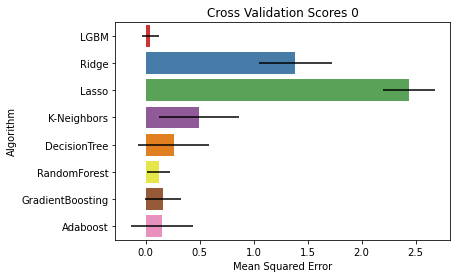

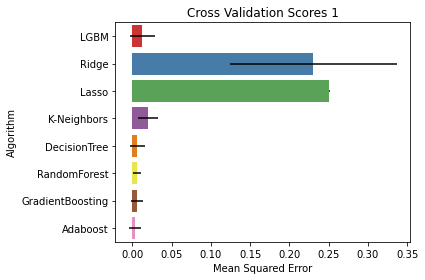

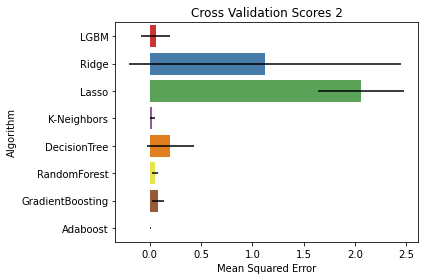

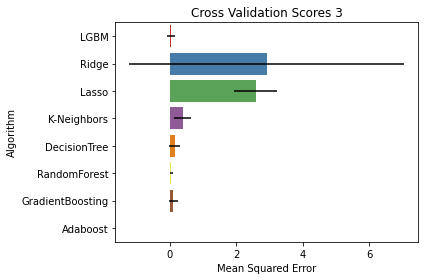

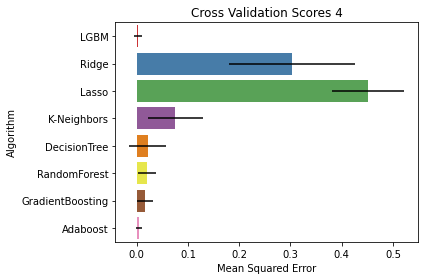

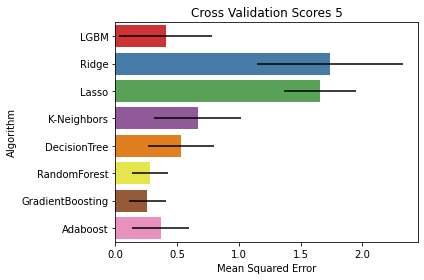

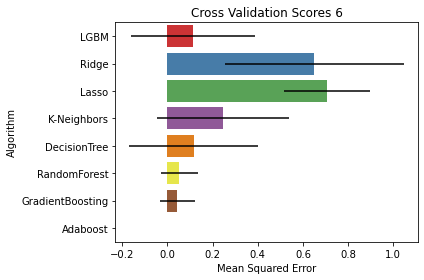

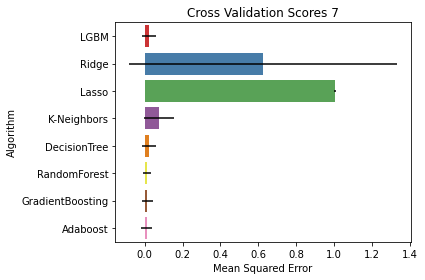

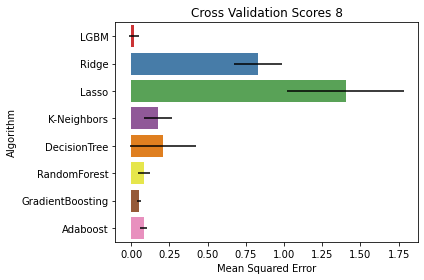

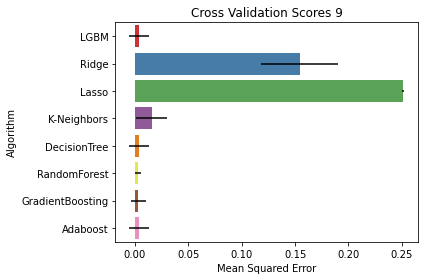

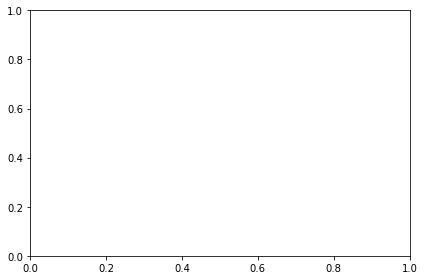

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
#from sklearn.model_selection import StratifiedKFold,KFold
import os 
import re

import warnings
warnings.filterwarnings('ignore')

def get_area_data(area_id=0, flag='train', path='./area_feature/'):
    file_name = path+'area_' + str(area_id) + '_' + flag + '.csv'
    return pd.read_csv(file_name,index_col=0)

if __name__ == "__main__":

    x_mse = []
    x_bias = []
    x_var = []


    for area in range(cluster_size):
        print(f"Area_{area}:")
        train_data = get_area_data(area, 'train')
        valid_data = get_area_data(area, 'valid')

        print("Training......")

        long_data = train_data[train_data['label_M']==0]
        short_data = train_data[train_data['label_M']!=0]
        if len(long_data)<len(short_data) :
            long_data,short_data = short_data,long_data
        short_data = short_data.sample(len(long_data), replace=True)
        train_data = pd.concat([long_data,short_data])
        train_data = train_data.sample(frac=1).reset_index(drop=True)
        del long_data
        del short_data

        target_M = train_data['label_M']
        train_feature = train_data.drop(['label_M','label_long','label_lati','Day'],axis=1)

        for i, ss in enumerate(target_M):
            if(ss<3.5):
                target_M.iloc[i] = 0
            elif(ss<4.0):
                target_M.iloc[i] = 1
            elif(ss<4.5):
                target_M.iloc[i] = 2
            elif(ss<5.0):
                target_M.iloc[i] = 3
            else:
                target_M.iloc[i] = 4

        train_data['weight'] = None
        train_data['label_M'] = target_M
        train_data['weight'][train_data['label_M']==0] = 1
        train_data['weight'][train_data['label_M']==1] = 1
        train_data['weight'][train_data['label_M']==2] = 1
        train_data['weight'][train_data['label_M']==3] = 1
        train_data['weight'][train_data['label_M']==4] = 1
        weight_T = train_data['weight'].values
        valid_M = valid_data['label_M']
        valid_feature = valid_data.drop(['label_M','label_long','label_lati','Day'],axis=1)
        for i, ss in enumerate(valid_M):
            if(ss<3.5):
                valid_M.iloc[i] = 0
            elif(ss<4.0):
                valid_M.iloc[i] = 1
            elif(ss<4.5):
                valid_M.iloc[i] = 2
            elif(ss<5.0):
                valid_M.iloc[i] = 3
            else:
                valid_M.iloc[i] = 4
        valid_data['weight'] = None
        valid_data['label_M'] = valid_M
        valid_data['weight'][valid_data['label_M']==0] = 1
        valid_data['weight'][valid_data['label_M']==1] = 1
        valid_data['weight'][valid_data['label_M']==2] = 1
        valid_data['weight'][valid_data['label_M']==3] = 1
        valid_data['weight'][valid_data['label_M']==4] = 1
        weight_V = valid_data['weight'].values

        params = {
        'num_leaves': 48,
        'learning_rate': 0.05,
        "boosting": "rf",
        'objective': 'multiclass',
        'num_class': 5,
        # 'objective': 'regression',
        "feature_fraction": 0.6,
        "bagging_fraction": 0.6,
        "bagging_freq": 2,
        "lambda_l1": 0.05,
        "lambda_l2": 0.05,
        "nthread": -1,
        'min_child_samples': 10,
        'max_bin': 200,
        'verbose' : -1
        }
 


        #Build the Models
        random_state = 1

        # Step 1: create a list containing all estimators with their default parameters
        model_list = [LGBMClassifier(), Ridge(), Lasso(),
                KNeighborsRegressor(), DecisionTreeRegressor(),
                RandomForestRegressor(), GradientBoostingRegressor(), 
                AdaBoostRegressor()]


        # Step 2: calculate the cross-validation mean and standard deviation for the estimators
        cv_mean, cv_std = [], []

        
        for mdl in model_list: 
            print('-----------------------------', mdl)
            cv = cross_val_score(mdl, train_feature, y = target_M, scoring='neg_mean_squared_error', cv = 7, n_jobs = -1)
            
            cv_mean.append(abs(cv.mean()))
            cv_std.append(cv.std())

                
        # Step 3: create a dataframe and plot  means with error bars
        cv_total = pd.DataFrame({'Algorithm': [ 'LGBM', 'Ridge', 'Lasso',
                'K-Neighbors', 'DecisionTree', 
                'RandomForest', 'GradientBoosting',
                'Adaboost'],
                                'CV-Means': cv_mean, 
                                'CV-Errors': cv_std})

        figs=sns.barplot(x='CV-Means', y='Algorithm', data = cv_total, palette = 'Set1', orient = 'h',\
                    **{'xerr': cv_std})
        plt.xlabel('Mean Squared Error')
        plt.title('Cross Validation Scores '+ str(area))
        plt.subplots(tight_layout=True)
        plt.savefig('output/Area_%03d.jpeg'%(area))


        # estimate the bias and variance for a regression model
        from pandas import read_csv
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LinearRegression
        from mlxtend.evaluate import bias_variance_decomp
        import pandas as pd
        import numpy as np
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import AdaBoostClassifier
        from sklearn.model_selection import StratifiedKFold,KFold
        import pandas as pd
        import numpy as np
        from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
        import xgboost as xgb
        from xgboost import XGBClassifier
        from sklearn.model_selection import StratifiedKFold,KFold
        import pandas as pd
        import numpy as np
        from sklearn.metrics import accuracy_score
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import StratifiedKFold,KFold
        from sklearn.metrics import mean_squared_error

 

        # estimate bias and variance
        for i in range(len(model_list)):
            mse, bias, var = bias_variance_decomp(model_list[i], train_feature.values, target_M.values, valid_feature.values, valid_M.values, loss='mse', num_rounds=200, random_seed=1)

            x_mse.append(mse)
            x_bias.append(bias)
            x_var.append(var)

            # summarize results
            print(str(model_list[i]))
            print('  MSE: %.3f' % mse)
            print('  Bias: %.3f' % bias)
            print('  Variance: %.3f' % var)



        # classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy",random_state=5)  
        # classifier.fit(train_feature,target_M) 
        # y_pred_rf=classifier.predict(valid_feature)
        # print(accuracy_score(valid_M,y_pred_rf))

        # xgb_clf=XGBClassifier(eval_metric='mlogloss')
        # xgb_clf.fit(train_feature,target_M)
        # y_pred_xgb=xgb_clf.predict(valid_feature)
        # print(accuracy_score(valid_M,y_pred_xgb))
        # xgb_clf.save_model('./model1/'+str(area)+'_mag_model.txt')

        # abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
        #                                                 n_estimators=200,
        #                                                 learning_rate=0.1,
        #                                                 algorithm="SAMME.R",
        #                                                 random_state=1, )
        # abd_clf.fit(train_feature,target_M)
        # y_pred_rf=abd_clf.predict(valid_feature)
        # print(accuracy_score(valid_M,y_pred_rf))
        # print(mean_squared_error(valid_M,y_pred_rf))
               
        num_round = 5000
        trn_data = lgb.Dataset(train_feature, label=target_M,weight=weight_T)
        val_data = lgb.Dataset(valid_feature, label=valid_M, weight=weight_V)
        lgb_clf = lgb.train(params, trn_data, num_round, valid_sets=[trn_data,val_data],verbose_eval=50,
                        early_stopping_rounds=500)


        y_pred_lgb=lgb_clf.predict(valid_feature)
        # print(accuracy_score(valid_M,y_pred_lgb))
        lgb_clf.save_model('./model/'+str(area)+'_mag_model.txt')


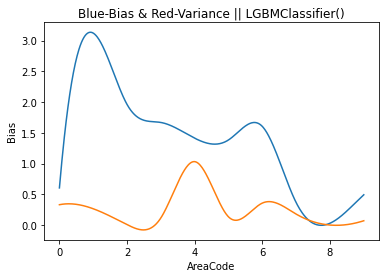

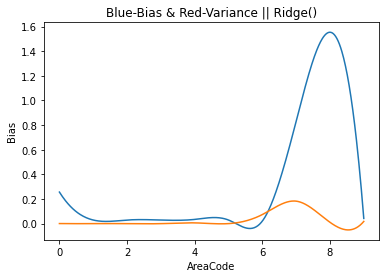

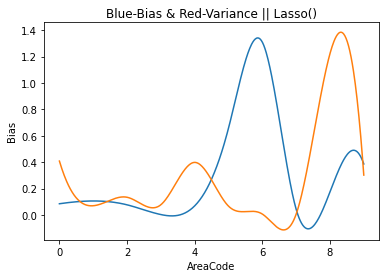

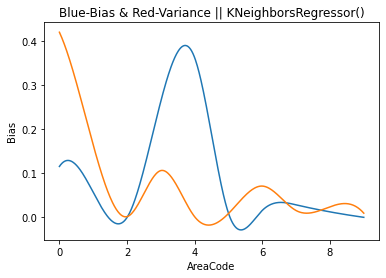

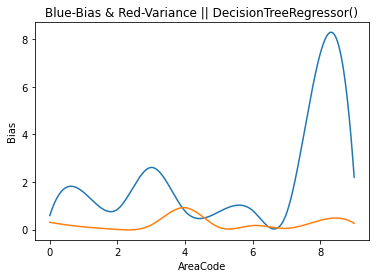

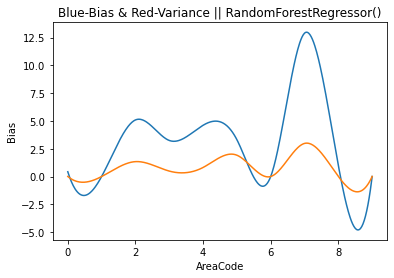

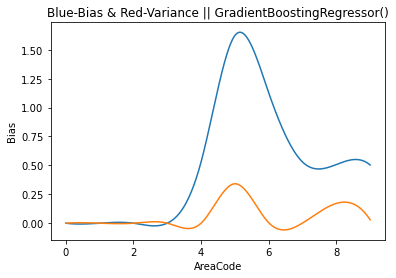

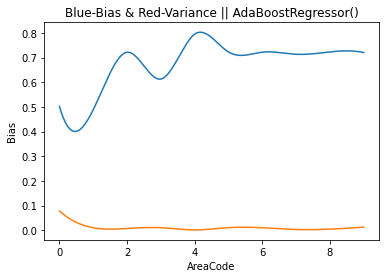

In [ ]:

import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


for i in range(int(len(x_mse)/10)):
    temp_mse=[]
    temp_mse.append(x_mse[(i*10)+0])
    temp_mse.append(x_mse[(i*10)+1])
    temp_mse.append(x_mse[(i*10)+2])
    temp_mse.append(x_mse[(i*10)+3])
    temp_mse.append(x_mse[(i*10)+4])
    temp_mse.append(x_mse[(i*10)+5])
    temp_mse.append(x_mse[(i*10)+6])
    temp_mse.append(x_mse[(i*10)+7])
    temp_mse.append(x_mse[(i*10)+8])
    temp_mse.append(x_mse[(i*10)+9])

    temp_bias=[]
    temp_bias.append(x_bias[(i*10)+0])
    temp_bias.append(x_bias[(i*10)+1])
    temp_bias.append(x_bias[(i*10)+2])
    temp_bias.append(x_bias[(i*10)+3])
    temp_bias.append(x_bias[(i*10)+4])
    temp_bias.append(x_bias[(i*10)+5])
    temp_bias.append(x_bias[(i*10)+6])
    temp_bias.append(x_bias[(i*10)+7])
    temp_bias.append(x_bias[(i*10)+8])
    temp_bias.append(x_bias[(i*10)+9])

    temp_var=[]
    temp_var.append(x_var[(i*10)+0])
    temp_var.append(x_var[(i*10)+1])
    temp_var.append(x_var[(i*10)+2])
    temp_var.append(x_var[(i*10)+3])
    temp_var.append(x_var[(i*10)+4])
    temp_var.append(x_var[(i*10)+5])
    temp_var.append(x_var[(i*10)+6])
    temp_var.append(x_var[(i*10)+7])
    temp_var.append(x_var[(i*10)+8])
    temp_var.append(x_var[(i*10)+9])

    x=np.array([0,1,2,3,4,5,6,7,8,9])


    X_Y_Spline1 = make_interp_spline(x, temp_bias)
    X_1 = np.linspace(x.min(), x.max(), 500)
    Y_1 = X_Y_Spline1(X_1)
    X_Y_Spline2 = make_interp_spline(x, temp_var)
    X_2 = np.linspace(x.min(), x.max(), 500)
    Y_2 = X_Y_Spline2(X_2)
    plt.plot(X_1, Y_1)
    plt.plot(X_2, Y_2)
    plt.title("Blue-Bias & Red-Variance || "+str(model_list[i]))
    plt.xlabel("AreaCode")
    plt.ylabel('Bias')
    plt.show()



Area_0:
Training......
----------------------------- LGBMClassifier()
----------------------------- Ridge()
----------------------------- Lasso()
----------------------------- KNeighborsRegressor()
----------------------------- DecisionTreeRegressor()
----------------------------- RandomForestRegressor()
----------------------------- GradientBoostingRegressor()
----------------------------- AdaBoostRegressor()
MSE: 0.861
Bias: 0.557
Variance: 0.304
MSE: 3.316
Bias: 3.027
Variance: 0.289
MSE: 1.930
Bias: 1.923
Variance: 0.007
MSE: 1.796
Bias: 1.681
Variance: 0.115
MSE: 2.110
Bias: 1.099
Variance: 1.011
MSE: 1.333
Bias: 1.199
Variance: 0.135
MSE: 1.499
Bias: 1.191
Variance: 0.309
MSE: 0.539
Bias: 0.326
Variance: 0.213
Area_1:
Training......
----------------------------- LGBMClassifier()
----------------------------- Ridge()
----------------------------- Lasso()
----------------------------- KNeighborsRegressor()
----------------------------- DecisionTreeRegressor()
----------------------

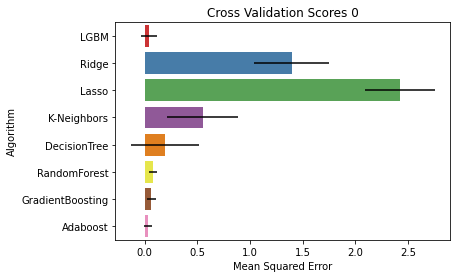

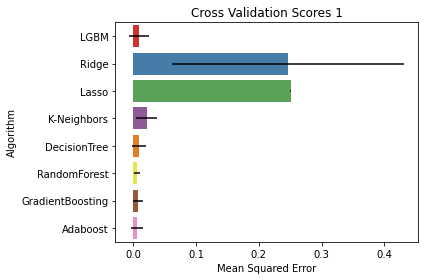

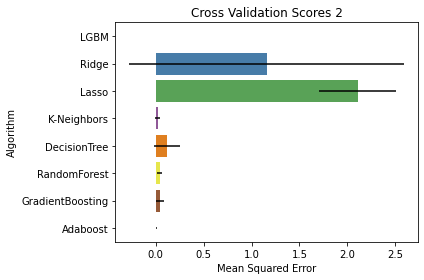

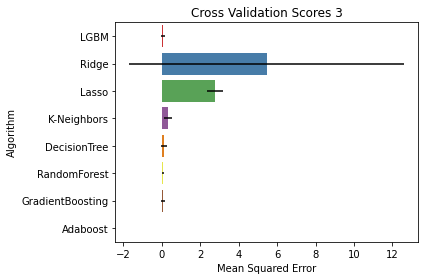

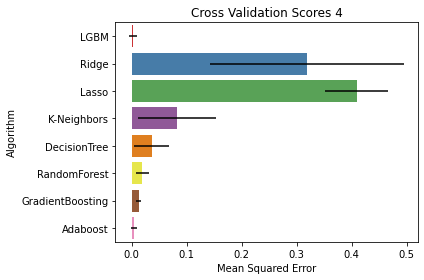

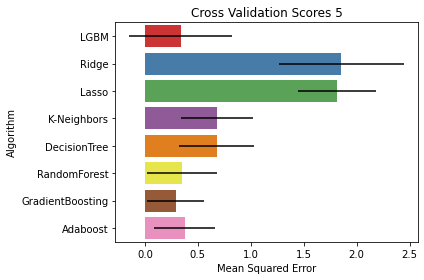

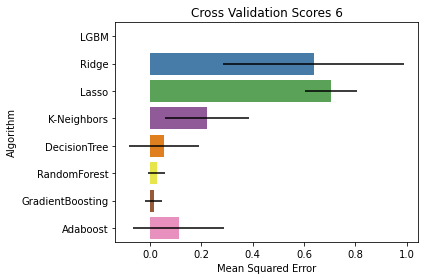

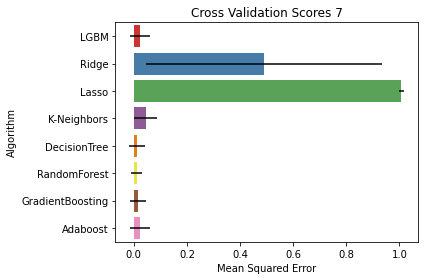

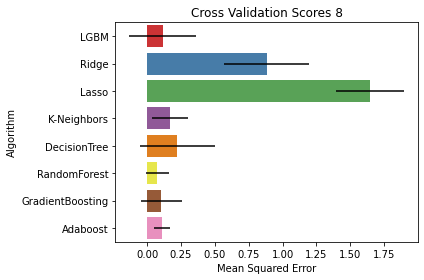

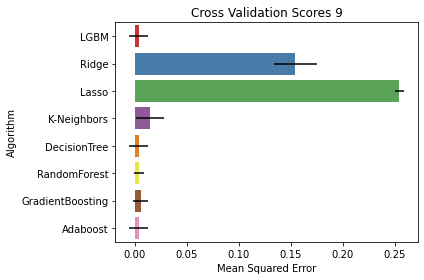

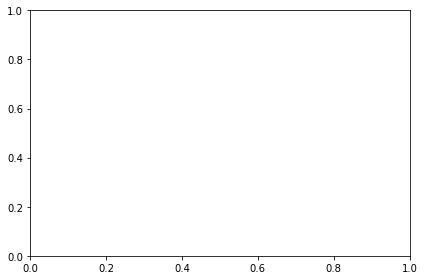

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
#from sklearn.model_selection import StratifiedKFold,KFold
import os 
import re

import warnings
warnings.filterwarnings('ignore')

def get_area_data(area_id=0, flag='train', path='./area_feature/'):
    file_name = path+'area_' + str(area_id) + '_' + flag + '.csv'
    return pd.read_csv(file_name,index_col=0)

if __name__ == "__main__":
    for area in range(cluster_size):
        print(f"Area_{area}:")
        train_data = get_area_data(area, 'train')
        valid_data = get_area_data(area, 'valid')

        print("Training......")

        long_data = train_data[train_data['label_M']==0]
        short_data = train_data[train_data['label_M']!=0]
        if len(long_data)<len(short_data) :
            long_data,short_data = short_data,long_data
        short_data = short_data.sample(len(long_data), replace=True)
        train_data = pd.concat([long_data,short_data])
        train_data = train_data.sample(frac=1).reset_index(drop=True)
        del long_data
        del short_data

        target_M = train_data['label_M']
        train_feature = train_data.drop(['label_M','label_long','label_lati','Day'],axis=1)

        for i, ss in enumerate(target_M):
            if(ss<3.5):
                target_M.iloc[i] = 0
            elif(ss<4.0):
                target_M.iloc[i] = 1
            elif(ss<4.5):
                target_M.iloc[i] = 2
            elif(ss<5.0):
                target_M.iloc[i] = 3
            else:
                target_M.iloc[i] = 4

        train_data['weight'] = None
        train_data['label_M'] = target_M
        train_data['weight'][train_data['label_M']==0] = 1
        train_data['weight'][train_data['label_M']==1] = 1
        train_data['weight'][train_data['label_M']==2] = 1
        train_data['weight'][train_data['label_M']==3] = 1
        train_data['weight'][train_data['label_M']==4] = 1
        weight_T = train_data['weight'].values
        valid_M = valid_data['label_M']
        valid_feature = valid_data.drop(['label_M','label_long','label_lati','Day'],axis=1)
        for i, ss in enumerate(valid_M):
            if(ss<3.5):
                valid_M.iloc[i] = 0
            elif(ss<4.0):
                valid_M.iloc[i] = 1
            elif(ss<4.5):
                valid_M.iloc[i] = 2
            elif(ss<5.0):
                valid_M.iloc[i] = 3
            else:
                valid_M.iloc[i] = 4
        valid_data['weight'] = None
        valid_data['label_M'] = valid_M
        valid_data['weight'][valid_data['label_M']==0] = 1
        valid_data['weight'][valid_data['label_M']==1] = 1
        valid_data['weight'][valid_data['label_M']==2] = 1
        valid_data['weight'][valid_data['label_M']==3] = 1
        valid_data['weight'][valid_data['label_M']==4] = 1
        weight_V = valid_data['weight'].values

        params = {
        'num_leaves': 48,
        'learning_rate': 0.05,
        "boosting": "rf",
        'objective': 'multiclass',
        'num_class': 5,
        # 'objective': 'regression',
        "feature_fraction": 0.6,
        "bagging_fraction": 0.6,
        "bagging_freq": 2,
        "lambda_l1": 0.05,
        "lambda_l2": 0.05,
        "nthread": -1,
        'min_child_samples': 10,
        'max_bin': 200,
        'verbose' : -1
        }
        num_round = 5000

        #Build the Models
        random_state = 1

        # Step 1: create a list containing all estimators with their default parameters
        model_list = [LGBMClassifier(), Ridge(), Lasso(),
                KNeighborsRegressor(), DecisionTreeRegressor(),
                RandomForestRegressor(), GradientBoostingRegressor(), 
                AdaBoostRegressor()]


        # Step 2: calculate the cross-validation mean and standard deviation for the estimators
        cv_mean, cv_std = [], []

        
        for mdl in model_list: 
            print('-----------------------------', mdl)
            cv = cross_val_score(mdl, train_feature, y = target_M, scoring='neg_mean_squared_error', cv = 7, n_jobs = -1)
            
            cv_mean.append(abs(cv.mean()))
            cv_std.append(cv.std())

                
        # Step 3: create a dataframe and plot  means with error bars
        cv_total = pd.DataFrame({'Algorithm': [ 'LGBM', 'Ridge', 'Lasso',
                'K-Neighbors', 'DecisionTree', 
                'RandomForest', 'GradientBoosting',
                'Adaboost'],
                                'CV-Means': cv_mean, 
                                'CV-Errors': cv_std})

        figs=sns.barplot(x='CV-Means', y='Algorithm', data = cv_total, palette = 'Set1', orient = 'h',\
                    **{'xerr': cv_std})
        plt.xlabel('Mean Squared Error')
        plt.title('Cross Validation Scores '+ str(area))
        plt.subplots(tight_layout=True)
        plt.savefig('output/Area_%03d.jpeg'%(area))


        # estimate the bias and variance for a regression model
        from pandas import read_csv
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LinearRegression
        from mlxtend.evaluate import bias_variance_decomp

        model = LinearRegression()
        # estimate bias and variance
        for i in range(len(model_list)):
            mse, bias, var = bias_variance_decomp(model_list[i], train_feature.values, target_M.values, valid_feature.values, valid_M.values, loss='mse', num_rounds=200, random_seed=1)
            # summarize results
            print('MSE: %.3f' % mse)
            print('Bias: %.3f' % bias)
            print('Variance: %.3f' % var)



In [ ]:
import lightgbm as lgb
from numpy.lib.function_base import extract
import pandas as pd
import re
import numpy as np
import os
import zipfile
from toolkit import *
import warnings
warnings.filterwarnings('ignore')

re_train = re.compile(r'area_\d+_train.csv')
re_valid = re.compile(r'area_\d+_valid.csv')

_token = 'adfed407b859428ca98144d62bc7c1e0'

def download_aeta_data_to_file(data_type, date_range_str, save_to, token, oversea=False):
	assert data_type in ('EM', 'GA', 'EM&GA')
	import requests
	oversea = 'true' if oversea else 'false'
	url = 'https://api.competition.aeta.cn/downloadByToken'
	params = {
		'dataType': data_type,
		'date': date_range_str,
		'oversea': oversea,
	}
	resp = requests.get(url, params=params, headers={'Authorization': token})
	resp.raise_for_status()
	with open(save_to, 'wb') as fd:
		for chunk in resp.iter_content(chunk_size=128):
			fd.write(chunk)

def cacu_features_inf(df:pd.DataFrame, window:int, step:int,tag:str,Time_Range) ->pd.DataFrame:
    '''
    
    '''
    if(len(df)==0):
        return None
    df.reset_index(drop=True,inplace=True)
    averageName = tag+'@abs_mean'
    df.rename(columns={averageName:'average'},inplace=True)
    df['average'] = df['average']-df['average'].mean()
    df['diff_1'] = df.groupby('StationID')['average'].shift(1)
    df['diff_1'] = df['average'].values - df['diff_1'].values


    df.loc[:,'Day'] = df['TimeStamp']
    _start_timestamp = string2stamp(Time_Range[0])
    df['Day'] = df['Day'] - _start_timestamp
    df['Day'] = (df['Day']//86400+1).astype(int)
    df.reset_index()
    tmp = pd.DataFrame(sorted(df['Day'].unique()))
    tmp.columns=['Day']
    res_df = pd.DataFrame((tmp['Day']//step+1).unique()).astype(int)
    res_df.columns=['Day']
    res_df['Day'] = res_df['Day']*step
    for feature in ['average', 'diff_1']:
        for tagging in ['max', 'min', 'mean']:
            kk = df.groupby('Day')[feature].agg(tagging)
            kk.rename(f'{feature}_day_{tagging}',inplace=True)
            tmp = pd.merge(tmp, kk, how='left',on='Day')
        #max_mean.min_mean:
        tmp[f'{feature}_day_max_mean'] = tmp[f'{feature}_day_max'].rolling(window=window,center=False).mean()
        tmp[f'{feature}_day_min_mean'] = tmp[f'{feature}_day_min'].rolling(window=window,center=False).mean()
        #mean_max,mean_min:
        tmp[f'{feature}_day_mean_max'] = tmp[f'{feature}_day_mean'].rolling(window=window,center=False).max()
        tmp[f'{feature}_day_mean_min'] = tmp[f'{feature}_day_mean'].rolling(window=window,center=False).min()
        res_df = pd.merge(res_df,tmp[['Day',f'{feature}_day_max_mean',f'{feature}_day_min_mean',f'{feature}_day_mean_max',f'{feature}_day_mean_min']],on='Day',how='left')

        res_df[f'{feature}_mean'] = None
        res_df[f'{feature}_max'] = None
        res_df[f'{feature}_min'] = None
        res_df[f'{feature}_max_min'] = None
        for i,row in res_df.iterrows():
            endDay = row['Day']
            startDay = endDay - window
            data_se = df[(df['Day']>startDay)&(df['Day']<=endDay)][feature]
            res_df[f'{feature}_mean'].iloc[i] = data_se.mean()
            res_df[f'{feature}_max'].iloc[i] = data_se.max()
            res_df[f'{feature}_min'].iloc[i] = data_se.min()
            res_df[f'{feature}_max_min'].iloc[i] = data_se.max() - data_se.min()

        res_df[f'{feature}_lastday_mean'] = None
        res_df[f'{feature}_lastday_max'] = None
        res_df[f'{feature}_lastday_min'] = None
        res_df[f'{feature}_lastday_max_min'] = None
        for i,row in res_df.iterrows():
            endDay = row['Day']
            data_last = df[df['Day']==endDay][feature]
            res_df[f'{feature}_lastday_mean'].iloc[i] = data_last.mean()
            res_df[f'{feature}_lastday_max'].iloc[i] = data_last.max()
            res_df[f'{feature}_lastday_min'].iloc[i] = data_last.min()
            res_df[f'{feature}_lastday_max_min'].iloc[i] = data_last.max() - data_last.min()
    
    for name in res_df.columns.to_list():
        if(name=='Day'):continue
        res_df.rename(columns={name:(name+'_'+tag)},inplace=True)
    res_df.dropna(axis=0,how='any',inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df

if __name__ == "__main__":
	save_path = './data_week/EM&GA_'
	#time_range = ['20201201', '20201231']
	time_range = ['20210502', '20210508']
	file_name = time_range[0]+'-'+time_range[1]
	extractpath = './data_week/'+file_name+'/'
	# download_aeta_data_to_file("EM&GA",file_name,save_path+file_name+'.zip', _token)
	frzip = zipfile.ZipFile(save_path+file_name+'.zip','r')
	extractfile = frzip.namelist()
	frzip.extractall(extractpath)
	frzip.close()
	# em_path = f'{extractpath}EM&GA_{time_range[0]}-{time_range[1]}/EM_{time_range[0]}-{time_range[1]}/'
	# ga_path = f'{extractpath}EM&GA_{time_range[0]}-{time_range[1]}/GA_{time_range[0]}-{time_range[1]}/'
	em_path = f'{extractpath}EM_{time_range[0]}-{time_range[1]}/'
	ga_path = f'{extractpath}GA_{time_range[0]}-{time_range[1]}/'
	for filename in os.listdir(em_path):
		if(filename.endswith('.csv')):continue
		with zipfile.ZipFile(em_path+filename,'r') as frzip:
			frzip.extractall(em_path)
	for filename in os.listdir(ga_path):
		if(filename.endswith('.csv')):continue
		with zipfile.ZipFile(ga_path+filename,'r') as frzip:
			frzip.extractall(ga_path)

	max_mag = -1
	eq_area = -1
	for area in range(cluster_size):
		sid = area_groups[area]['id']

		em_list = []
		for id_num in sid:
			try:
				em_list.append(pd.read_csv(em_path+f'{id_num}_magn.csv'))
			except:
				continue
		em_data = pd.concat(em_list)
		del em_list
		ga_list = []
		for id_num in sid:
			try:
				ga_list.append(pd.read_csv(ga_path+f'{id_num}_sound.csv'))
			except:
				continue
		ga_data = pd.concat(ga_list)
		del ga_list
		em_data = cacu_features_inf(em_data, 7, 7,'magn',time_range)
		ga_data = cacu_features_inf(ga_data, 7, 7,'sound',time_range)
		_final_res = pd.merge(em_data,ga_data,on='Day',how='left')
		_final_res.fillna(0,inplace=True)
		_final_res.drop('Day',axis=1,inplace=True)
		features = _final_res.iloc[-1]

		lgb_model = lgb.Booster(model_file=f'./model/{area}_mag_model.txt')

		predict = np.matrix(lgb_model.predict(
			features, num_iteration=lgb_model.best_iteration))
		predict = predict[0].argmax(axis=1)
		if predict[0] == 0:
			print(f'Area {area}')
			print('No Earthquake')
			print('.......................................................')
			continue
		else:
			if(predict[0] > max_mag):
				max_mag = predict[0,0]
				eq_area = area
		magn_level = {0:0, 1:3.7, 2:4.2, 3:4.7, 4:5}
		long = (area_groups[eq_area]['range'][2]+area_groups[eq_area]['range'][3])/2
		lati = (area_groups[eq_area]['range'][0]+area_groups[eq_area]['range'][1])/2
		print(f'Area {area}')
		print(f'Magnitude :{magn_level[max_mag]}, Longitude :{long}, Latitude: {lati}')
		print('.......................................................')



Area 0
Magnitude :4.2, Longitude :104.49375, Latitude: 29.564375000000002
.......................................................
Area 1
No Earthquake
.......................................................
Area 2
Magnitude :4.2, Longitude :104.49375, Latitude: 29.564375000000002
.......................................................
Area 3
No Earthquake
.......................................................
Area 4
No Earthquake
.......................................................
Area 5
Magnitude :4.2, Longitude :104.49375, Latitude: 29.564375000000002
.......................................................
Area 6
Magnitude :4.7, Longitude :98.858, Latitude: 29.736
.......................................................
Area 7
Magnitude :4.7, Longitude :98.858, Latitude: 29.736
.......................................................
Area 8
No Earthquake
.......................................................
Area 9
Magnitude :4.7, Longitude :98.858, Latitude: 29.736
.............

In [ ]:
def submit_prediction(whether, *, token, longitude=None, latitude=None, magnitude=None):
    import requests
    url = 'https://api.competition.aeta.cn/submitPrediction'
    if whether:
        data = {
          'whether': True,
          'longitude': longitude,
          'latitude': latitude,
          'magnitude': magnitude,
        }
    else:
        data = { 'whether': False }
    resp = requests.post(url, data=data, headers={'Authorization': token})
    result = resp.json()

    if resp.ok:
      info = f"whether={result['whether']}, longitude={result['longitude']}, latitude={result['latitude']}, magnitude={result['magnitude']}"
      msg = f"Submit success: group={result['groupName']}, week={result['week']}, {info}"
      print(msg)
    else:
      msg = f"""Fail to submit prediction: whether={whether}, longitude={longitude}, latitude={latitude}, magnitude={magnitude}
Reason: ({result['status']}) {result['message']}
"""
      raise Exception(msg)

# submit_prediction(False, token="my-secret-token")
# submit_prediction(True, magnitude=4.5, longitude=4.678, latitude=5.246, token="my-secret-token")

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("current =", dt_string)	

current = 23/10/2021 02:15:06
